# **Data Analysis in High Energy Physics: Exercise 1.5 $p$-values**

**Find the number of standard deviations corresponding to $p$-values of 10%, 5%, and 1% for a Gaussian distribution. Consider both one-sided and two-sided $p$-values.**

**Reminder:** The error function is defined as the symmetric integral over the range of the standard Gaussian,  
$\displaystyle \text{erf}(x) = \frac{1}{\sqrt{\pi}} \int\limits_{-x}^{x}e^{-t^2}\,dt = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{x}e^{-t^2}\,dt\,,$  
and so the probability for Gaussian distributed data to lie within $y$ of the mean is  
$\displaystyle P(\mu - y \leq x \leq \mu + y) = \int\limits_{\mu - y}^{\mu + y} \frac{1}{\sqrt{2\pi} \sigma} e^{-(x-\mu)^2/2\sigma^2}\,dx = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{y/\sqrt{2}\sigma} e^{-t^2}\,dt = \text{erf}\left(\frac{y}{\sqrt{2}\sigma}\right)\,.$

In [2]:
import math
import numpy as np
from scipy import special as special
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from prettytable import PrettyTable

## Two-tailed $p$-value

As for the two-tailed Gaussian,  
$\displaystyle p(x) = P(\left|X\right| \geq x) = 1-\text{erf}\left(\frac{x}{\sqrt{2}\sigma}\right) \equiv \text{erfc}\left(\frac{x}{\sqrt{2}\sigma}\right)$,  
it is seen that for $x=n \sigma$, then

$\displaystyle p(n \sigma) = P(\left|X\right| \geq n \sigma) = 1-\text{erf}\left(\frac{n}{\sqrt{2}}\right)$,

thus,

$\displaystyle \text{erf}\left(\frac{n}{\sqrt{2}}\right) = 1 - p(n \sigma)$.

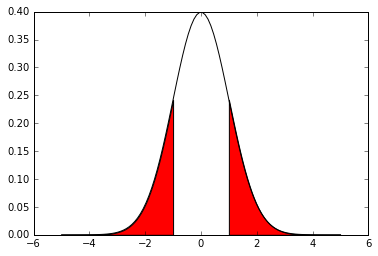

In [3]:
mean = 0
sigma = 1
nsigma = 1
x = np.linspace(-5,5,100)
plt.plot(x,mlab.normpdf(x,mean,sigma),color='black')

xlTail = np.linspace(-5,-nsigma)
xrTail = np.linspace(nsigma,5)
plt.fill_between(xlTail,0,mlab.normpdf(xlTail,mean,sigma),facecolor='red')
plt.fill_between(xrTail,0,mlab.normpdf(xrTail,mean,sigma),facecolor='red')

plt.show()

However, at this point we are at an impass analytically, as the integral of a Gaussian function over a finite range has no analytical solution, and must be evaluated numerically.  
  
So using erfc,

In [4]:
pvalues = [0.10, 0.05, 0.01]

for p in pvalues:
    print("{} standard deviations corresponds to a p-value of {}".format(math.sqrt(2.)*special.erfcinv(p),p))

1.64485362695 standard deviations corresponds to a p-value of 0.1
1.95996398454 standard deviations corresponds to a p-value of 0.05
2.57582930355 standard deviations corresponds to a p-value of 0.01


and using erf,

In [5]:
for p in pvalues:
    print("{} standard deviations corresponds to a p-value of {}".format(math.sqrt(2.)*special.erfinv(1-p),p))

1.64485362695 standard deviations corresponds to a p-value of 0.1
1.95996398454 standard deviations corresponds to a p-value of 0.05
2.57582930355 standard deviations corresponds to a p-value of 0.01


the same output is found (as required by the defintion of the functions).

## One-tailed $p$-value

A one-sided *p*-value considers the probability for the data to have produced a value as extreme or grearer than the observed value on only one side of the distribution. For example, the *p*-value for the right tail of a Gaussian is $p(x) = \displaystyle P\left(X \geq x\right) = 1-\Phi(x)$, and the *p*-value for the left tail of a Gaussian is $p(-x) = \displaystyle P\left(X \leq -x\right) = \Phi(-x)$.  

It is seen by symmetry $p(x) = p(-x)$ and that for a normalized Gaussian a one-tailed *p*-vaule is 1/2 that of a two-tailed *p*-value.

\begin{split}
    p(x) = P\left(X \geq \left|x\right|\right)&= 1 - \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x} e^{-t^2/2}\,dt = 1 - \frac{1}{2}\left(1+\text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)\\
    &= 1-\Phi(x)\\
    &= \frac{1}{2}\left(1-\text{erf}\left(\frac{x}{\sqrt{2}}\right)\right) = \frac{1}{2}\text{erfc}\left(\frac{x}{\sqrt{2}}\right)
\end{split}

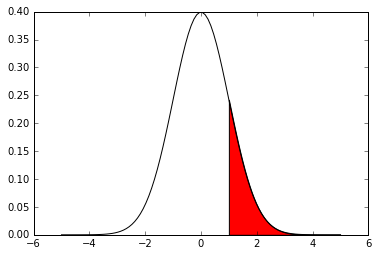

In [6]:
plt.plot(x,mlab.normpdf(x,mean,sigma),color='black')
plt.fill_between(xrTail,0,mlab.normpdf(xrTail,mean,sigma),facecolor='red')

plt.show()

thus for $x = n \sigma$,

$\displaystyle \text{erf}\left(\frac{n\sigma}{\sqrt{2}}\right) = 1 - 2\,p(n \sigma)$.

In [7]:
for p in pvalues:
    print("{} standard deviations corresponds to a p-value of {}".format((math.sqrt(2.)/sigma)*special.erfcinv(2*p),p))

print("")
    
for p in pvalues:    
    print("{} standard deviations corresponds to a p-value of {}".format((math.sqrt(2.)/sigma)*special.erfinv(1-2*p),p))

1.28155156554 standard deviations corresponds to a p-value of 0.1
1.64485362695 standard deviations corresponds to a p-value of 0.05
2.32634787404 standard deviations corresponds to a p-value of 0.01

1.28155156554 standard deviations corresponds to a p-value of 0.1
1.64485362695 standard deviations corresponds to a p-value of 0.05
2.32634787404 standard deviations corresponds to a p-value of 0.01


## Summary

In [8]:
def nSigmaTwoTailed(p):
    return math.sqrt(2.)*special.erfcinv(p)

def nSigmaOneTailed(p, sigma):
    return (math.sqrt(2.)/sigma)*special.erfcinv(2*p)

In [9]:
# this needs to be turned into a loop of some sort
t = PrettyTable()
t.field_names = ["p-values", "n sigma 2-tailed", "n sigma 1-tailed"]
t.add_row([pvalues[0], nSigmaTwoTailed(pvalues[0]), nSigmaOneTailed(pvalues[0],sigma)])
t.add_row([pvalues[1], nSigmaTwoTailed(pvalues[1]), nSigmaOneTailed(pvalues[1],sigma)])
t.add_row([pvalues[2], nSigmaTwoTailed(pvalues[2]), nSigmaOneTailed(pvalues[2],sigma)])

print(t)

+----------+------------------+------------------+
| p-values | n sigma 2-tailed | n sigma 1-tailed |
+----------+------------------+------------------+
|   0.1    |  1.64485362695   |  1.28155156554   |
|   0.05   |  1.95996398454   |  1.64485362695   |
|   0.01   |  2.57582930355   |  2.32634787404   |
+----------+------------------+------------------+


### Sanity Check

In [10]:
checkvalues = [0.317310507863, 0.045500263896, 0.002699796063, 0.000063342484, 0.000000573303]

for p in checkvalues:
    print("{:0.3f} standard deviations corresponds to a p-value of {}".format(nSigmaTwoTailed(p),p))

1.000 standard deviations corresponds to a p-value of 0.317310507863
2.000 standard deviations corresponds to a p-value of 0.045500263896
3.000 standard deviations corresponds to a p-value of 0.002699796063
4.000 standard deviations corresponds to a p-value of 6.3342484e-05
5.000 standard deviations corresponds to a p-value of 5.73303e-07


$\checkmark$

## References

1.) FAQ: What are the differences between one-tailed and two-tailed tests?  
UCLA: Institute for Digital Research and Education.  
from http://www.ats.ucla.edu/stat/mult_pkg/faq/general/tail_tests.htm